## Customer Profiling Instacart - Part 2

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

## Marketing strategies based on custome profiles

## Count of number of customers in age groups, with or without dependants and income groups

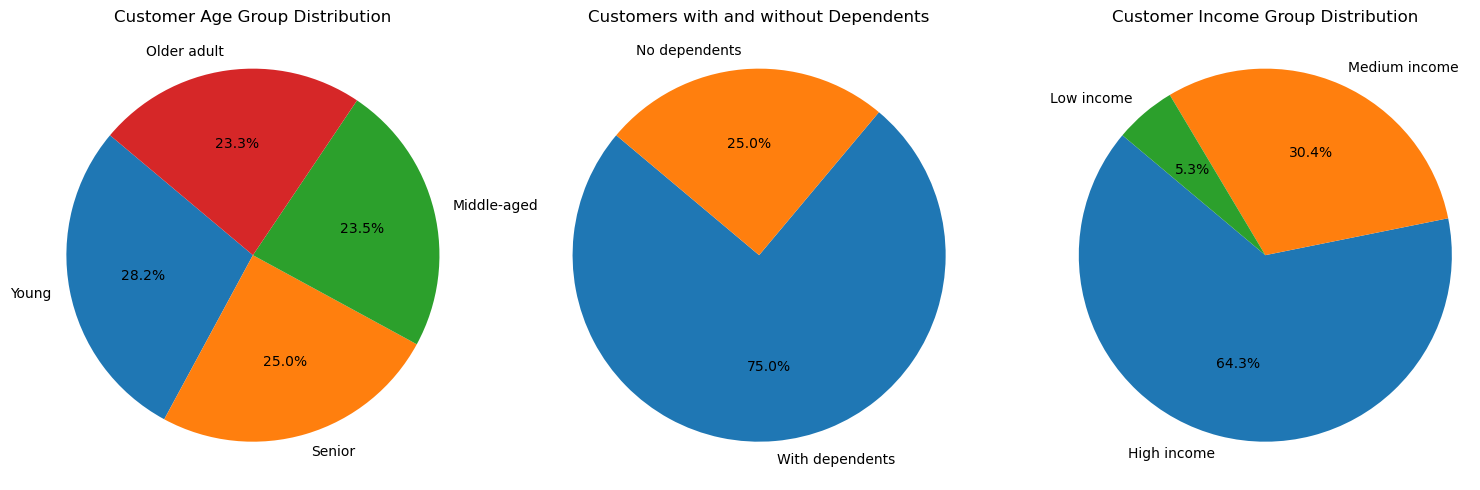

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Load the anonymized data
combined_anonymized_file_path = "/Users/ging/Documents/Data Analytics Course/04_2024_Instacart Basket Analysis/02 Data/Prepared Data/anonymized_ords_prods_customers.pkl"
ords_prods_customers_anonymized = pd.read_pickle(combined_anonymized_file_path)

# Define customer profiles
def create_age_group(row):
    if row['Age'] <= 35:
        return "Young"
    elif row['Age'] <= 50:
        return "Middle-aged"
    elif row['Age'] <= 65:
        return "Older adult"
    else:
        return "Senior"

def create_dependents_group(row):
    if row['n_dependants'] == 0:
        return "No dependents"
    else:
        return "With dependents"

def create_income_group(row):
    if row['income'] <= 40000:
        return "Low income"
    elif row['income'] <= 80000:
        return "Medium income"
    else:
        return "High income"

ords_prods_customers_anonymized['age_group'] = ords_prods_customers_anonymized.apply(create_age_group, axis=1)
ords_prods_customers_anonymized['dependents_group'] = ords_prods_customers_anonymized.apply(create_dependents_group, axis=1)
ords_prods_customers_anonymized['income_group'] = ords_prods_customers_anonymized.apply(create_income_group, axis=1)

# Count the number of customers in each age group
age_group_counts = ords_prods_customers_anonymized['age_group'].value_counts()

# Count the number of customers with and without dependents
dependents_counts = ords_prods_customers_anonymized['dependents_group'].value_counts()

# Count the number of customers in each income group
income_group_counts = ords_prods_customers_anonymized['income_group'].value_counts()

# Create directory if it doesn't exist
save_path = '/Users/ging/Documents/Data Analytics Course/04_2024_Instacart Basket Analysis/04 Analysis/Visualizations/'
if not os.path.exists(save_path):
    os.makedirs(save_path)

# Plot and save pie charts
plt.figure(figsize=(15, 5))

# Pie chart for age group distribution
plt.subplot(1, 3, 1)
plt.pie(age_group_counts, labels=age_group_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Customer Age Group Distribution')
plt.axis('equal')
plt.savefig(os.path.join(save_path, 'customer_age_group_distribution.png'))

# Pie chart for customers with and without dependents
plt.subplot(1, 3, 2)
plt.pie(dependents_counts, labels=dependents_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Customers with and without Dependents')
plt.axis('equal')
plt.savefig(os.path.join(save_path, 'customer_dependents_distribution.png'))

# Pie chart for income group distribution
plt.subplot(1, 3, 3)
plt.pie(income_group_counts, labels=income_group_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Customer Income Group Distribution')
plt.axis('equal')
plt.savefig(os.path.join(save_path, 'customer_income_group_distribution.png'))

plt.tight_layout()
plt.show()  # Show pie charts

# Export the final dataset
final_dataset_file_path = "/Users/ging/Documents/Data Analytics Course/04_2024_Instacart Basket Analysis/02 Data/Prepared Data/final_dataset.pkl"
ords_prods_customers_anonymized.to_pickle(final_dataset_file_path)



## Crosstab, min, max and mean of age groups, dependant groups, income groups with days since prior order and total order numbers

In [5]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

# Load the anonymized data
combined_anonymized_file_path = "/Users/ging/Documents/Data Analytics Course/04_2024_Instacart Basket Analysis/02 Data/Prepared Data/anonymized_ords_prods_customers.pkl"
ords_prods_customers_anonymized = pd.read_pickle(combined_anonymized_file_path)

# Define functions to create groups
def create_age_group(row):
    if row['Age'] <= 35:
        return "Young"
    elif row['Age'] <= 50:
        return "Middle-aged"
    elif row['Age'] <= 65:
        return "Older adult"
    else:
        return "Senior"

def create_dependents_group(row):
    if row['n_dependants'] == 0:
        return "No dependents"
    else:
        return "With dependents"

def create_income_group(row):
    if row['income'] <= 40000:
        return "Low income"
    elif row['income'] <= 80000:
        return "Medium income"
    else:
        return "High income"

# Apply functions to create groups
ords_prods_customers_anonymized['age_group'] = ords_prods_customers_anonymized.apply(create_age_group, axis=1)
ords_prods_customers_anonymized['dependents_group'] = ords_prods_customers_anonymized.apply(create_dependents_group, axis=1)
ords_prods_customers_anonymized['income_group'] = ords_prods_customers_anonymized.apply(create_income_group, axis=1)

# Define the directory to save visualizations
save_path = '/Users/ging/Documents/Data Analytics Course/04_2024_Instacart Basket Analysis/04 Analysis/Visualizations/'

if not os.path.exists(save_path):
    os.makedirs(save_path)

# Calculate min, mean, and max for each group and variable combination
# 1) Age group and days_since_prior_order
crosstab_age_days = ords_prods_customers_anonymized.groupby(['age_group'])['days_since_prior_order'].agg(['min', 'mean', 'max'])

# Print and save the table
print("1) Age group and days_since_prior_order:")
print(crosstab_age_days)
crosstab_age_days.to_csv(os.path.join(save_path, 'crosstab_age_days.csv'))
crosstab_age_days.plot(kind='bar')
plt.title('Age group and days_since_prior_order')
plt.xlabel('Age Group')
plt.ylabel('Days Since Prior Order')
plt.savefig(os.path.join(save_path, 'crosstab_age_days.png'))
plt.clf()

# 2) Age group and total of order_number
crosstab_age_order_number = ords_prods_customers_anonymized.groupby(['age_group'])['order_number'].agg(['min', 'mean', 'max'])

# Print and save the table
print("\n2) Age group and total of order_number:")
print(crosstab_age_order_number)
crosstab_age_order_number.to_csv(os.path.join(save_path, 'crosstab_age_order_number.csv'))
crosstab_age_order_number.plot(kind='bar')
plt.title('Age group and total of order_number')
plt.xlabel('Age Group')
plt.ylabel('Order Number')
plt.savefig(os.path.join(save_path, 'crosstab_age_order_number.png'))
plt.clf()

# 3) Dependents group and days_since_prior_order
crosstab_dependents_days = ords_prods_customers_anonymized.groupby(['dependents_group'])['days_since_prior_order'].agg(['min', 'mean', 'max'])

# Print and save the table
print("\n3) Dependents group and days_since_prior_order:")
print(crosstab_dependents_days)
crosstab_dependents_days.to_csv(os.path.join(save_path, 'crosstab_dependents_days.csv'))
crosstab_dependents_days.plot(kind='bar')
plt.title('Dependents group and days_since_prior_order')
plt.xlabel('Dependents Group')
plt.ylabel('Days Since Prior Order')
plt.savefig(os.path.join(save_path, 'crosstab_dependents_days.png'))
plt.clf()

# 4) Dependents group and total of order_number
crosstab_dependents_order_number = ords_prods_customers_anonymized.groupby(['dependents_group'])['order_number'].agg(['min', 'mean', 'max'])

# Print and save the table
print("\n4) Dependents group and total of order_number:")
print(crosstab_dependents_order_number)
crosstab_dependents_order_number.to_csv(os.path.join(save_path, 'crosstab_dependents_order_number.csv'))
crosstab_dependents_order_number.plot(kind='bar')
plt.title('Dependents group and total of order_number')
plt.xlabel('Dependents Group')
plt.ylabel('Order Number')
plt.savefig(os.path.join(save_path, 'crosstab_dependents_order_number.png'))
plt.clf()

# 5) Income group and days_since_prior_order
crosstab_income_days = ords_prods_customers_anonymized.groupby(['income_group'])['days_since_prior_order'].agg(['min', 'mean', 'max'])

# Print and save the table
print("\n5) Income group and days_since_prior_order:")
print(crosstab_income_days)
crosstab_income_days.to_csv(os.path.join(save_path, 'crosstab_income_days.csv'))
crosstab_income_days.plot(kind='bar')
plt.title('Income group and days_since_prior_order')
plt.xlabel('Income Group')
plt.ylabel('Days Since Prior Order')
plt.savefig(os.path.join(save_path, 'crosstab_income_days.png'))
plt.clf()

# 6) Income group and total of order_number
crosstab_income_order_number = ords_prods_customers_anonymized.groupby(['income_group'])['order_number'].agg(['min', 'mean', 'max'])

# Print and save the table
print("\n6) Income group and total of order_number:")
print(crosstab_income_order_number)
crosstab_income_order_number.to_csv(os.path.join(save_path, 'crosstab_income_order_number.csv'))
crosstab_income_order_number.plot(kind='bar')
plt.title('Income group and total of order_number')
plt.xlabel('Income Group')
plt.ylabel('Order Number')
plt.savefig(os.path.join(save_path, 'crosstab_income_order_number.png'))
plt.clf()


1) Age group and days_since_prior_order:
             min       mean   max
age_group                        
Middle-aged  0.0  11.082987  30.0
Older adult  0.0  11.125193  30.0
Senior       0.0  11.081283  30.0
Young        0.0  11.124662  30.0

2) Age group and total of order_number:
             min       mean  max
age_group                       
Middle-aged    1  17.233244   99
Older adult    1  17.132688   99
Senior         1  17.104121   99
Young          1  17.106950   99

3) Dependents group and days_since_prior_order:
                  min       mean   max
dependents_group                      
No dependents     0.0  11.080606  30.0
With dependents   0.0  11.112009  30.0

4) Dependents group and total of order_number:
                  min       mean  max
dependents_group                     
No dependents       1  17.264680   99
With dependents     1  17.101029   99

5) Income group and days_since_prior_order:
               min       mean   max
income_group                  

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [ ]:
## Side-by-side bar charts for each combination of age group and dependents group within each income group

/var/folders/js/qjw18g4x3373q3ck5qtlhm6c0000gn/T/ipykernel_15195/2657821074.py:56: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top5_age_groups = age_group_sales.groupby('age_group').apply(get_top5_departments).reset_index(drop=True)
/var/folders/js/qjw18g4x3373q3ck5qtlhm6c0000gn/T/ipykernel_15195/2657821074.py:57: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top5_dependents_groups = dependents_group_sale

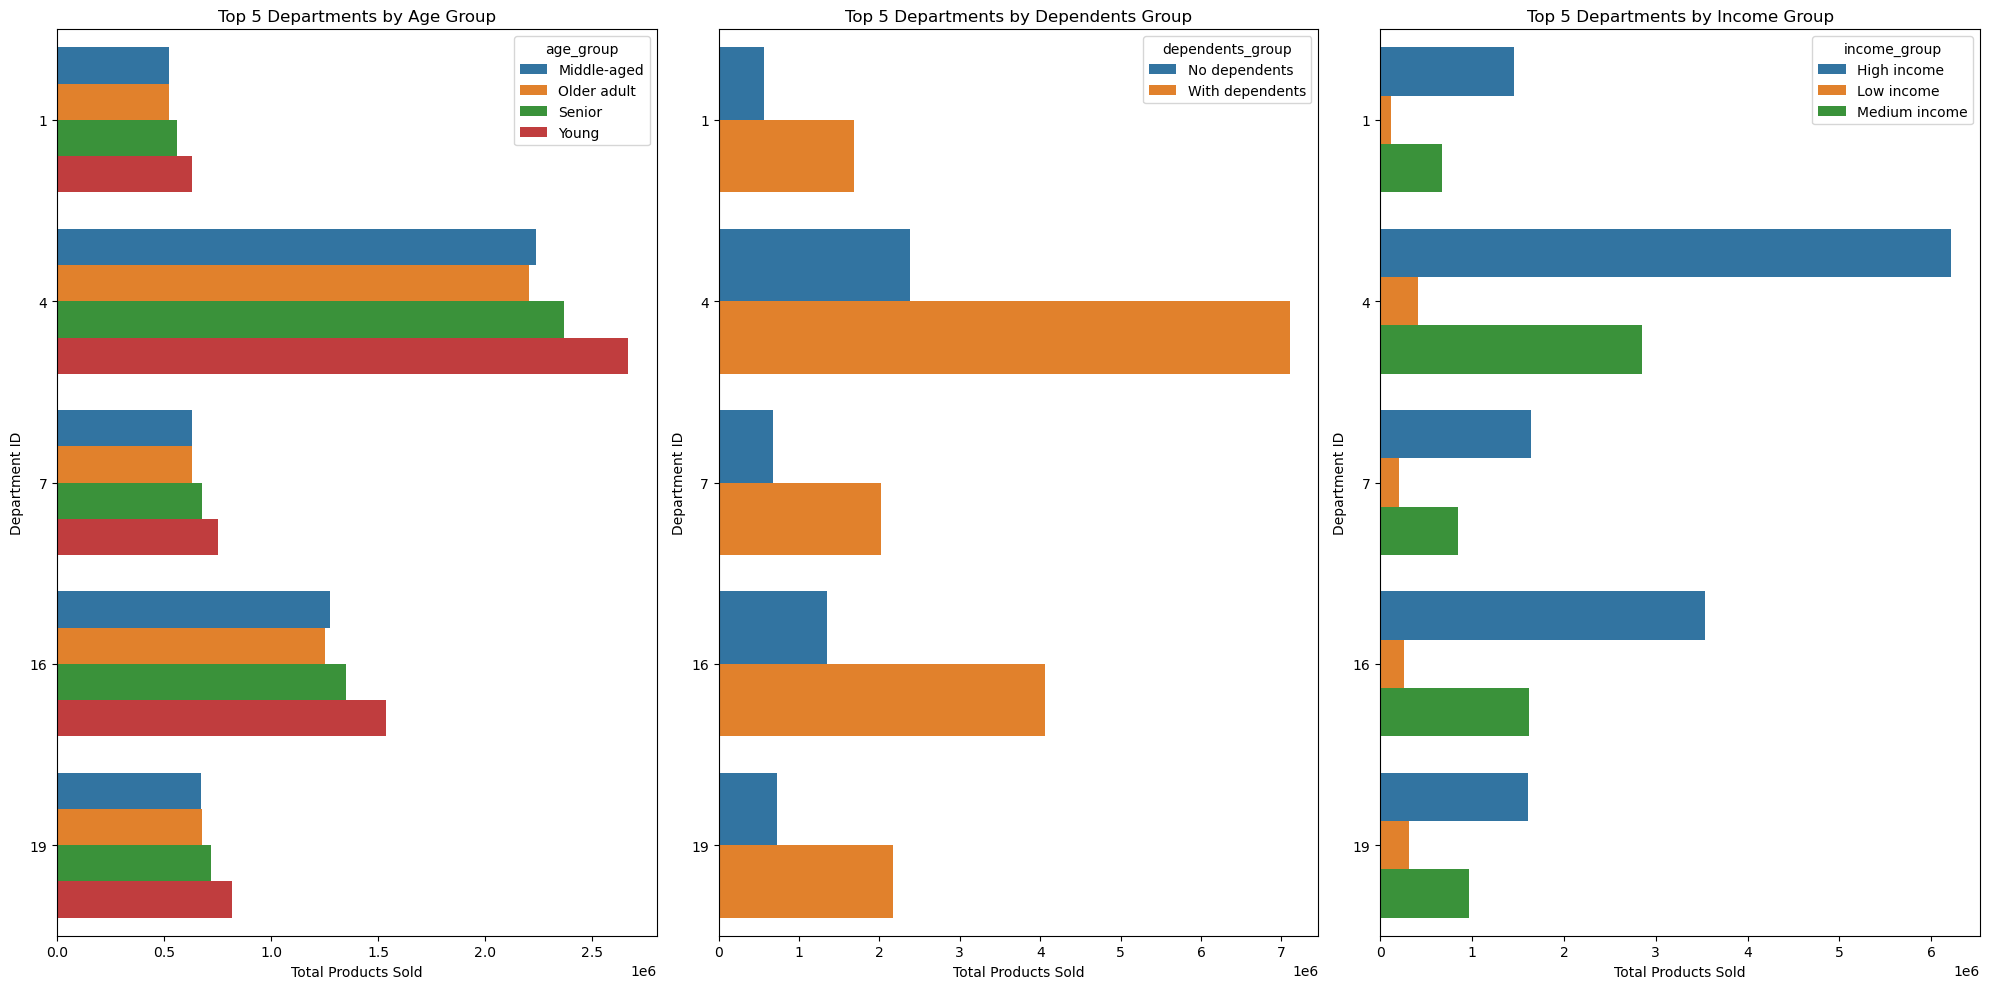

In [8]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

# Load the anonymized data
combined_anonymized_file_path = "/Users/ging/Documents/Data Analytics Course/04_2024_Instacart Basket Analysis/02 Data/Prepared Data/anonymized_ords_prods_customers.pkl"
ords_prods_customers_anonymized = pd.read_pickle(combined_anonymized_file_path)

# Define functions to create groups
def create_age_group(row):
    if row['Age'] <= 35:
        return "Young"
    elif row['Age'] <= 50:
        return "Middle-aged"
    elif row['Age'] <= 65:
        return "Older adult"
    else:
        return "Senior"

def create_dependents_group(row):
    if row['n_dependants'] == 0:
        return "No dependents"
    else:
        return "With dependents"

def create_income_group(row):
    if row['income'] <= 40000:
        return "Low income"
    elif row['income'] <= 80000:
        return "Medium income"
    else:
        return "High income"

# Apply functions to create groups
ords_prods_customers_anonymized['age_group'] = ords_prods_customers_anonymized.apply(create_age_group, axis=1)
ords_prods_customers_anonymized['dependents_group'] = ords_prods_customers_anonymized.apply(create_dependents_group, axis=1)
ords_prods_customers_anonymized['income_group'] = ords_prods_customers_anonymized.apply(create_income_group, axis=1)

# Define the directory to save visualizations
save_path = '/Users/ging/Documents/Data Analytics Course/04_2024_Instacart Basket Analysis/04 Analysis/Visualizations/'

if not os.path.exists(save_path):
    os.makedirs(save_path)

# Aggregate total products sold per department for each group
age_group_sales = ords_prods_customers_anonymized.groupby(['age_group', 'department_id']).size().reset_index(name='order_number')
dependents_group_sales = ords_prods_customers_anonymized.groupby(['dependents_group', 'department_id']).size().reset_index(name='order_number')
income_group_sales = ords_prods_customers_anonymized.groupby(['income_group', 'department_id']).size().reset_index(name='order_number')

# Function to get top 5 departments for a given group
def get_top5_departments(group):
    return group.nlargest(5, 'order_number')

# Get top 5 departments for each group
top5_age_groups = age_group_sales.groupby('age_group').apply(get_top5_departments).reset_index(drop=True)
top5_dependents_groups = dependents_group_sales.groupby('dependents_group').apply(get_top5_departments).reset_index(drop=True)
top5_income_groups = income_group_sales.groupby('income_group').apply(get_top5_departments).reset_index(drop=True)

# Plot the side-by-side horizontal bar charts
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 10))

# Plot top 5 departments for age groups
sns.barplot(data=top5_age_groups, x='order_number', y='department_id', hue='age_group', ax=axes[0], orient='h')
axes[0].set_title('Top 5 Departments by Age Group')
axes[0].set_xlabel('Total Products Sold')
axes[0].set_ylabel('Department ID')

# Plot top 5 departments for dependents groups
sns.barplot(data=top5_dependents_groups, x='order_number', y='department_id', hue='dependents_group', ax=axes[1], orient='h')
axes[1].set_title('Top 5 Departments by Dependents Group')
axes[1].set_xlabel('Total Products Sold')
axes[1].set_ylabel('Department ID')

# Plot top 5 departments for income groups
sns.barplot(data=top5_income_groups, x='order_number', y='department_id', hue='income_group', ax=axes[2], orient='h')
axes[2].set_title('Top 5 Departments by Income Group')
axes[2].set_xlabel('Total Products Sold')
axes[2].set_ylabel('Department ID')

plt.tight_layout()

# Save the plot as an image
file_name = 'top5_departments_by_groups.png'
plt.savefig(os.path.join(save_path, file_name))
plt.show()
